In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load your methylation data from a file (assuming it's in a CSV format)
data = pd.read_csv('gbm_model_data_bg_rolled_all_matrixCin', sep = '\t')



In [23]:
# Step 1: Remove CpGs with any missing values
data_cleaned = data.dropna(axis=0, how='any')

print(data_cleaned.shape)
data_cleaned.head()

(23538718, 30)


,position,100-auto.bedgraph_rolled,103-auto.bedgraph_rolled,69-auto.bedgraph_rolled,95-auto.bedgraph_rolled,H01_B01-auto.bedgraph_rolled,H01_B03-auto.bedgraph_rolled,H01_TM-auto.bedgraph_rolled,H01_TM_ULPWGS-auto.bedgraph_rolled,H02_B01-auto.bedgraph_rolled,...,H04_TM_ULPWGS-auto.bedgraph_rolled,H05_B01b-auto.bedgraph_rolled,H05_B03-auto.bedgraph_rolled,H05_TM-auto.bedgraph_rolled,H05_TM__ULPWGS-auto.bedgraph_rolled,NU13-auto.bedgraph_rolled,NU20-auto.bedgraph_rolled,NU45-auto.bedgraph_rolled,NU56-auto.bedgraph_rolled,NU68-auto.bedgraph_rolled
685,chr1:181437,0.67,0.360,0.000,0.5,0.500,0.400,0.802,1.0,0.667,...,1.0,0.333,0.247,0.670,1.0,0.400,0.666,0.500,0.714,0.17
686,chr1:181439,0.67,0.560,0.330,0.5,0.500,0.600,0.813,1.0,0.497,...,1.0,0.500,0.753,0.698,1.0,0.800,0.666,0.620,0.571,0.50
687,chr1:181442,1.00,0.747,0.753,0.5,0.750,0.600,0.955,1.0,0.497,...,1.0,0.000,0.753,0.943,1.0,0.667,0.696,0.640,0.667,0.50
688,chr1:181450,1.00,0.646,0.503,1.0,0.598,0.500,1.000,1.0,0.667,...,1.0,0.333,0.753,0.971,1.0,0.667,0.800,0.500,0.571,0.67
2189,chr1:770490,1.00,0.750,1.000,1.0,0.847,0.854,1.000,1.0,0.724,...,1.0,0.859,0.818,0.848,1.0,1.000,0.717,0.918,0.844,1.00


In [24]:
data_cleaned.columns = data_cleaned.columns.str.rstrip('-auto.bedgraph_rolled')

In [25]:
data_cleaned.set_index(['position'], inplace = True)
data_cleaned.head()

,100,103,69,95,H01_B01,H01_B03,H01_TM,H01_TM_ULPWGS,H02_B01,H02_B03,...,H04_TM_ULPWGS,H05_B01,H05_B03,H05_TM,H05_TM__ULPWGS,NU13,NU20,NU45,NU56,NU68
position,,,,,,,,,,,,,,,,,,,,,
chr1:181437,0.67,0.360,0.000,0.5,0.500,0.400,0.802,1.0,0.667,0.503,...,1.0,0.333,0.247,0.670,1.0,0.400,0.666,0.500,0.714,0.17
chr1:181439,0.67,0.560,0.330,0.5,0.500,0.600,0.813,1.0,0.497,0.602,...,1.0,0.500,0.753,0.698,1.0,0.800,0.666,0.620,0.571,0.50
chr1:181442,1.00,0.747,0.753,0.5,0.750,0.600,0.955,1.0,0.497,0.750,...,1.0,0.000,0.753,0.943,1.0,0.667,0.696,0.640,0.667,0.50
chr1:181450,1.00,0.646,0.503,1.0,0.598,0.500,1.000,1.0,0.667,0.503,...,1.0,0.333,0.753,0.971,1.0,0.667,0.800,0.500,0.571,0.67
chr1:770490,1.00,0.750,1.000,1.0,0.847,0.854,1.000,1.0,0.724,1.000,...,1.0,0.859,0.818,0.848,1.0,1.000,0.717,0.918,0.844,1.00


In [43]:
# Rename the columns based on your criteria
sample_names = [
    'Pre_Sono' if 'B01' in name else
    'Post_Sono' if 'B03' in name else
    'ULPWGS' if 'ULPWGS' in name else
    'Tumor' if 'TM' in name else
    'Healthy'
    for name in data_cleaned.columns
]

# Update the column names in your DataFrame
data_cleaned.columns = sample_names
data_cleaned.head()

,Healthy,Healthy,Healthy,Healthy,Pre_Sono,Post_Sono,Tumor,Pre_Sono,Post_Sono,Tumor,...,Post_Sono,Tumor,Pre_Sono,Post_Sono,Tumor,Healthy,Healthy,Healthy,Healthy,Healthy
position,,,,,,,,,,,,,,,,,,,,,
chr1:181437,0.67,0.360,0.000,0.5,0.500,0.400,0.802,0.667,0.503,0.688,...,0.625,0.854,0.333,0.247,0.670,0.400,0.666,0.500,0.714,0.17
chr1:181439,0.67,0.560,0.330,0.5,0.500,0.600,0.813,0.497,0.602,0.906,...,0.625,0.900,0.500,0.753,0.698,0.800,0.666,0.620,0.571,0.50
chr1:181442,1.00,0.747,0.753,0.5,0.750,0.600,0.955,0.497,0.750,1.000,...,0.750,0.968,0.000,0.753,0.943,0.667,0.696,0.640,0.667,0.50
chr1:181450,1.00,0.646,0.503,1.0,0.598,0.500,1.000,0.667,0.503,0.970,...,1.000,0.967,0.333,0.753,0.971,0.667,0.800,0.500,0.571,0.67
chr1:770490,1.00,0.750,1.000,1.0,0.847,0.854,1.000,0.724,1.000,1.000,...,0.855,1.000,0.859,0.818,0.848,1.000,0.717,0.918,0.844,1.00


In [44]:
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.str.contains('ULPWGS|Tumor|Healthy')]
print(data_cleaned.shape)
data_cleaned.head()

(23538718, 10)


,Pre_Sono,Post_Sono,Pre_Sono,Post_Sono,Pre_Sono,Post_Sono,Pre_Sono,Post_Sono,Pre_Sono,Post_Sono
position,,,,,,,,,,
chr1:181437,0.500,0.400,0.667,0.503,0.774,0.695,1.00,0.625,0.333,0.247
chr1:181439,0.500,0.600,0.497,0.602,0.696,0.771,0.75,0.625,0.500,0.753
chr1:181442,0.750,0.600,0.497,0.750,0.774,0.735,0.75,0.750,0.000,0.753
chr1:181450,0.598,0.500,0.667,0.503,0.696,0.714,0.80,1.000,0.333,0.753
chr1:770490,0.847,0.854,0.724,1.000,1.000,0.934,0.75,0.855,0.859,0.818


In [45]:
print(data.shape)

(27911354, 30)


In [46]:
data_cleaned.columns

Index(['Pre_Sono', 'Post_Sono', 'Pre_Sono', 'Post_Sono', 'Pre_Sono',
       'Post_Sono', 'Pre_Sono', 'Post_Sono', 'Pre_Sono', 'Post_Sono'],
      dtype='object')

In [47]:
# Transpose the data so that each row represents a patient
data_transposed = data_cleaned.transpose()

In [48]:
data_transposed.shape

(10, 23538718)

In [49]:
# Step 2: Randomly sample a subset of CpGs
sample_size = 1000  # Adjust the sample size as needed
data_sampled = data_transposed.sample(n=sample_size, random_state=0, axis=1)  # Set a random seed for reproducibility
data_sampled.shape

(10, 1000)

In [50]:
# Extract the patient columns for PCA
patient_data = data_sampled #.iloc[:, 1:]  # Assuming the patient columns start from the second column (index 1)
patient_data.head()

position,chr5:91617263,chr3:10523482,chr11:50232496,chr3:133651075,chr18:70887181,chr3:76102066,chr7:156343007,chr17:32285867,chr1:31033585,chr1:246022407,...,chr1:27618120,chr17:3983509,chr10:51996094,chr5:180746533,chr19:3491611,chr17:10012929,chr2:72601033,chr16:1606751,chr21:32335334,chr16:73122426
Pre_Sono,0.778,0.087,0.500,0.667,0.835,0.872,0.667,0.075,0.913,0.909,...,0.570,0.777,0.500,0.790,1.000,1.000,1.000,0.857,0.837,0.804
Post_Sono,0.750,0.298,0.576,1.000,1.000,0.750,0.800,0.203,0.889,0.667,...,0.111,1.000,0.927,0.769,0.815,0.640,0.667,0.665,1.000,0.747
Pre_Sono,0.374,0.169,0.724,1.000,0.822,1.000,1.000,0.113,1.000,0.835,...,0.000,0.889,0.815,0.835,0.624,0.626,0.857,0.667,0.889,1.000
Post_Sono,0.918,0.398,0.714,0.833,0.929,0.802,1.000,0.100,1.000,0.898,...,0.167,0.667,0.933,0.875,1.000,1.000,0.600,0.887,0.910,1.000
Pre_Sono,0.929,0.359,0.600,1.000,0.778,0.725,0.857,0.170,0.900,0.891,...,0.500,0.556,0.771,0.624,0.900,0.857,0.887,0.625,1.000,0.798


In [51]:
patient_data = patient_data.rename_axis(None, axis=1)
patient_data.head()

,chr5:91617263,chr3:10523482,chr11:50232496,chr3:133651075,chr18:70887181,chr3:76102066,chr7:156343007,chr17:32285867,chr1:31033585,chr1:246022407,...,chr1:27618120,chr17:3983509,chr10:51996094,chr5:180746533,chr19:3491611,chr17:10012929,chr2:72601033,chr16:1606751,chr21:32335334,chr16:73122426
Pre_Sono,0.778,0.087,0.500,0.667,0.835,0.872,0.667,0.075,0.913,0.909,...,0.570,0.777,0.500,0.790,1.000,1.000,1.000,0.857,0.837,0.804
Post_Sono,0.750,0.298,0.576,1.000,1.000,0.750,0.800,0.203,0.889,0.667,...,0.111,1.000,0.927,0.769,0.815,0.640,0.667,0.665,1.000,0.747
Pre_Sono,0.374,0.169,0.724,1.000,0.822,1.000,1.000,0.113,1.000,0.835,...,0.000,0.889,0.815,0.835,0.624,0.626,0.857,0.667,0.889,1.000
Post_Sono,0.918,0.398,0.714,0.833,0.929,0.802,1.000,0.100,1.000,0.898,...,0.167,0.667,0.933,0.875,1.000,1.000,0.600,0.887,0.910,1.000
Pre_Sono,0.929,0.359,0.600,1.000,0.778,0.725,0.857,0.170,0.900,0.891,...,0.500,0.556,0.771,0.624,0.900,0.857,0.887,0.625,1.000,0.798


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled  = scaler.fit_transform(patient_data)

In [53]:
#patient_data.head()

In [54]:
patient_data.shape

(10, 1000)

In [55]:
# Step 3: Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [56]:
print(pca_df.shape)
pca_df.head()

(10, 2)


,PC1,PC2
0,2.614297,-12.857007
1,-9.908871,-2.160541
2,-18.795726,5.417325
3,-17.849290,-4.662990
4,-4.920098,-2.967484


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


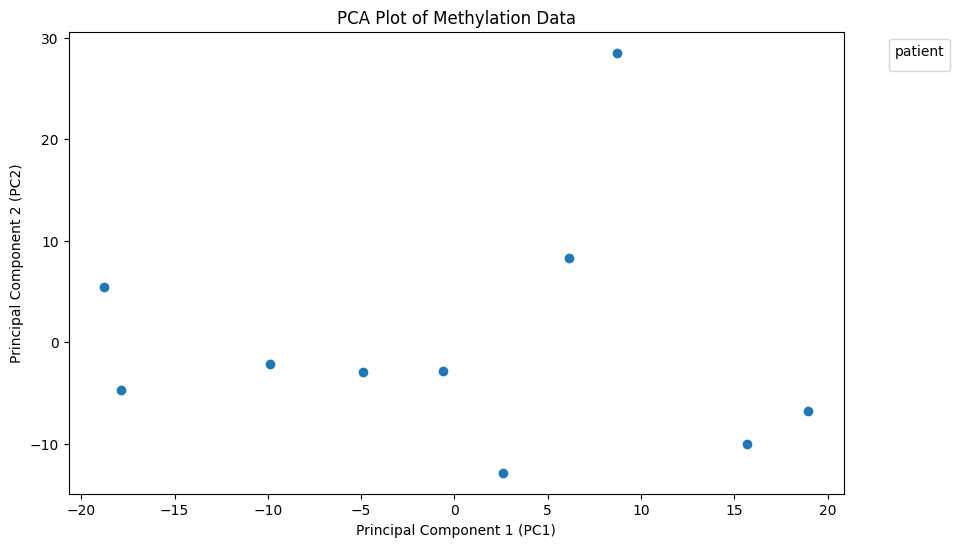

In [57]:
# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Plot of Methylation Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='patient', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [58]:
sample_groups = patient_data.index
sample_groups

Index(['Pre_Sono', 'Post_Sono', 'Pre_Sono', 'Post_Sono', 'Pre_Sono',
       'Post_Sono', 'Pre_Sono', 'Post_Sono', 'Pre_Sono', 'Post_Sono'],
      dtype='object')

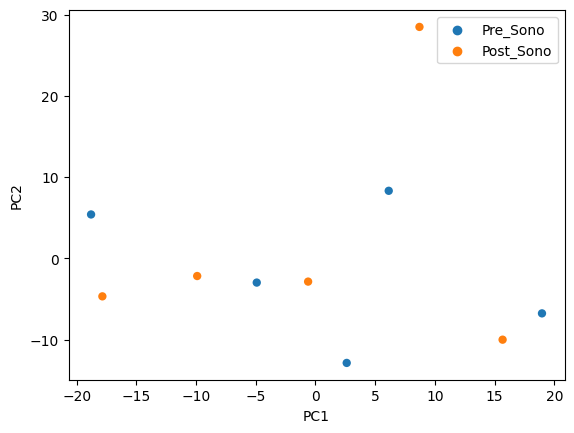

In [59]:
import seaborn as sns
%matplotlib inline  
g=sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=sample_groups,edgecolor='none')

# TODO: Is the above PCA really correct? Check in some public data